# **DATA PREPROCESSING STEPS**

## Steps Involved

1. **Load the Dataset**  
   Import the necessary libraries and load the dataset into a DataFrame.

2. **Check for Missing Values**  
   Identify any missing values in the dataset and calculate the percentage of missing data for each column.

3. **Check for Duplicates**  
   Determine if there are any duplicate rows in the dataset and remove them if found.

4. **Remove Outliers**  
   Identify and remove outliers using statistical methods (e.g., IQR method or Z-score).

5. **Check Value Counts**  
   Use the `describe` function to get a statistical summary of the dataset, which includes count, mean, standard deviation, min, max, and quartiles.


In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv")

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
print(f"Rows: {df.shape[0]} , Columns: {df.shape[1]}.")

if df.isnull().sum().sum()-0:
    print("There are missing values in the dataframe.")
else:
    print("There are no missing values in the dataframe.")

if df.duplicated().sum()-0:
    print("There are duplicate values in the dataframe.")
else:
    print("There are no duplicate values in the dataframe.")


Rows: 973 , Columns: 15.
There are no missing values in the dataframe.
There are no duplicate values in the dataframe.


In [6]:
for coll in df.columns:
    if df[coll].dtypes in ["int64", "float64"]:
        Q1 = df[coll].quantile(0.25)
        Q3 = df[coll].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[coll] >= lower_bound) & (df[coll] <= upper_bound)]

# Outlier detection
from sklearn.ensemble import IsolationForest

numeric_cols = df.select_dtypes(include=[np.number])
iso_forest = IsolationForest(contamination=0.01) 
preds = iso_forest.fit_predict(numeric_cols)
non_outliers_mask = preds != -1
df = df[non_outliers_mask]


In [7]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,921.000000,38.875136,12.121964,18.000000,28.000000,40.000000,50.000000,59.000000
Weight (kg),921.000000,71.853529,19.360614,40.000000,57.700000,68.600000,83.600000,127.500000
Height (m),921.000000,1.722552,0.127843,1.500000,1.620000,1.710000,1.800000,2.000000
Max_BPM,921.000000,179.926167,11.479707,160.000000,170.000000,180.000000,190.000000,199.000000
Avg_BPM,921.000000,143.375679,14.294192,120.000000,131.000000,142.000000,156.000000,169.000000
Resting_BPM,921.000000,62.238871,7.331991,50.000000,56.000000,63.000000,68.000000,74.000000
Session_Duration (hours),921.000000,1.252410,0.335820,0.500000,1.050000,1.260000,1.450000,1.990000
Calories_Burned,921.000000,895.807818,258.455296,303.000000,720.000000,887.000000,1069.000000,1598.000000
Fat_Percentage,921.000000,25.192725,6.191941,10.000000,21.300000,26.400000,29.400000,35.000000
Water_Intake (liters),921.000000,2.606732,0.599146,1.500000,2.100000,2.600000,3.100000,3.700000


# **DATA VISUALIZATION**

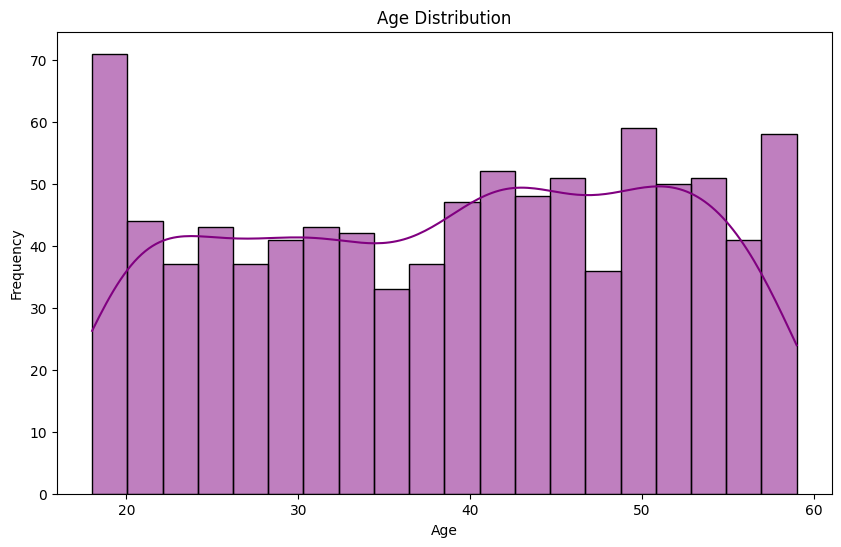

In [8]:
plt.figure(figsize=(10, 6))  

sns.histplot(df['Age'], bins=20, kde=True, color='purple')  

plt.title('Age Distribution')  
plt.xlabel('Age')  
plt.ylabel('Frequency')  

plt.show()

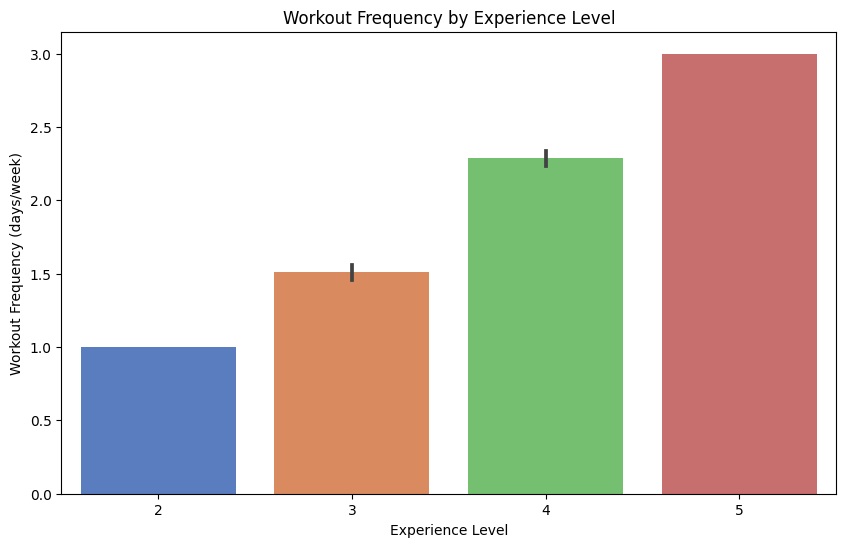

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Experience_Level', x='Workout_Frequency (days/week)', data=df, palette="muted")
plt.title('Workout Frequency by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (days/week)')
plt.show()

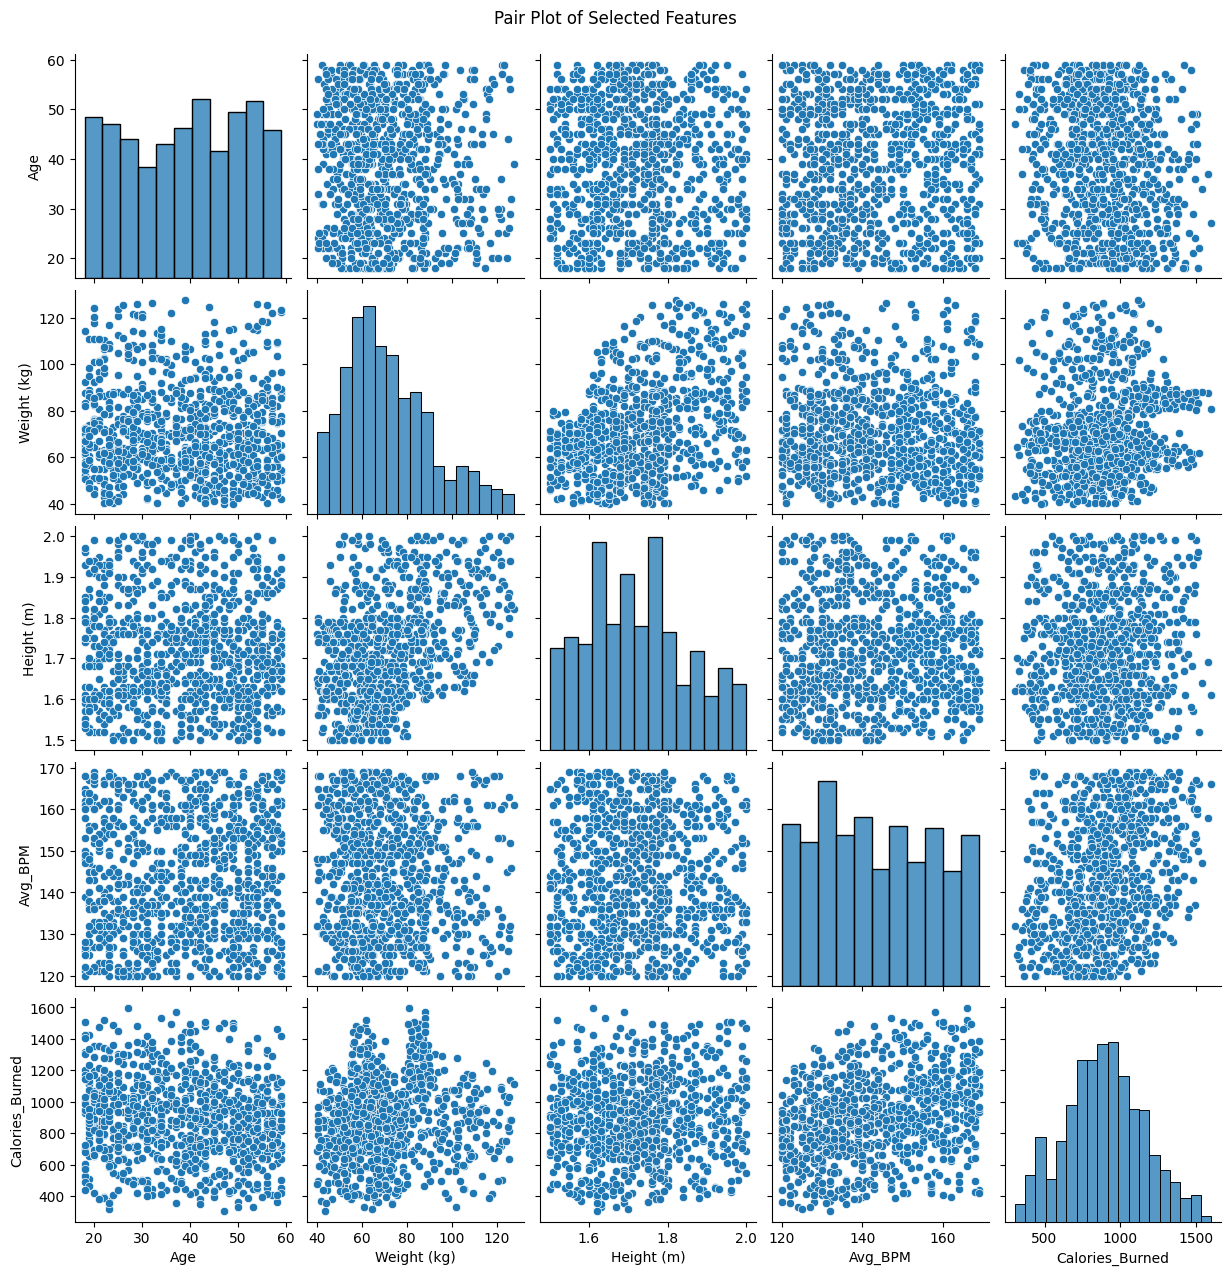

In [10]:
selected_features = df[['Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Calories_Burned']]
sns.pairplot(selected_features, palette='Blues')  
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# **Model Building**


> *The following steps are involved in the model building*

1. **Assigning X and y** 
   - Assign the features to `X` and the target variable to `y`.

2. **Splitting Test and Training Sets**
   - Split the dataset into training and testing sets using `train_test_split`.

3. **Initializing the Models**

   - We will initialize various machine learning models, as listed below
   
   - **Logistic Regression**
   - **DecisionTreeRegressor**
   - **RandomForestRegressorg** 
   - **KNeighborsRegressor**    
   - **XGBRegressor**    

In [11]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

# import regression agorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [12]:
label_encoders = {}
for column in ['Gender', 'Workout_Type', 'Experience_Level']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=["int64","float64"]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Choose a target variable
X = df.drop(columns=['Calories_Burned'])  
y = df['Calories_Burned'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [13]:
# Dictionary of models with parameters to evaluate performance
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, min_samples_split=10),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    'XG Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


In [14]:

# Initialize variables to track the best model
best_model_name = None
best_model = None
best_r2_score = -float('inf')

# Train, predict, and evaluate each model
model_score = []
for name, model in models.items():
    model.fit(X_train, y_train)  

    # Make predictions from each model
    y_pred = model.predict(X_test)  

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics in the list
    model_score.append((name, mse, r2, mae))

    # Print the performance metrics
    print(f"{name} - MSE: {mse}")
    print(f"{name} - R²: {r2}")
    print(f"{name} - MAE: {mae}\n")

    # Update the best model if current model's R² score is higher
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name
        best_model = model

print(f"Best Model: {best_model_name} with R² score of {best_r2_score}")

Linear Regression - MSE: 0.02512148782695206
Linear Regression - R²: 0.9783197392163367
Linear Regression - MAE: 0.11873441574337427

Decision Tree Regressor - MSE: 0.08409457843968225
Decision Tree Regressor - R²: 0.9274249835987624
Decision Tree Regressor - MAE: 0.23083322194788242

Random Forest Regressor - MSE: 0.050694064624363766
Random Forest Regressor - R²: 0.9562501811671784
Random Forest Regressor - MAE: 0.17578813535933202

KNeighbors Regressor - MSE: 0.20165436834963293
KNeighbors Regressor - R²: 0.825968934479492
KNeighbors Regressor - MAE: 0.357757286295287

XG Regressor - MSE: 0.006158611610853607
XG Regressor - R²: 0.9946850160027005
XG Regressor - MAE: 0.060991448030986814

Best Model: XG Regressor with R² score of 0.9946850160027005


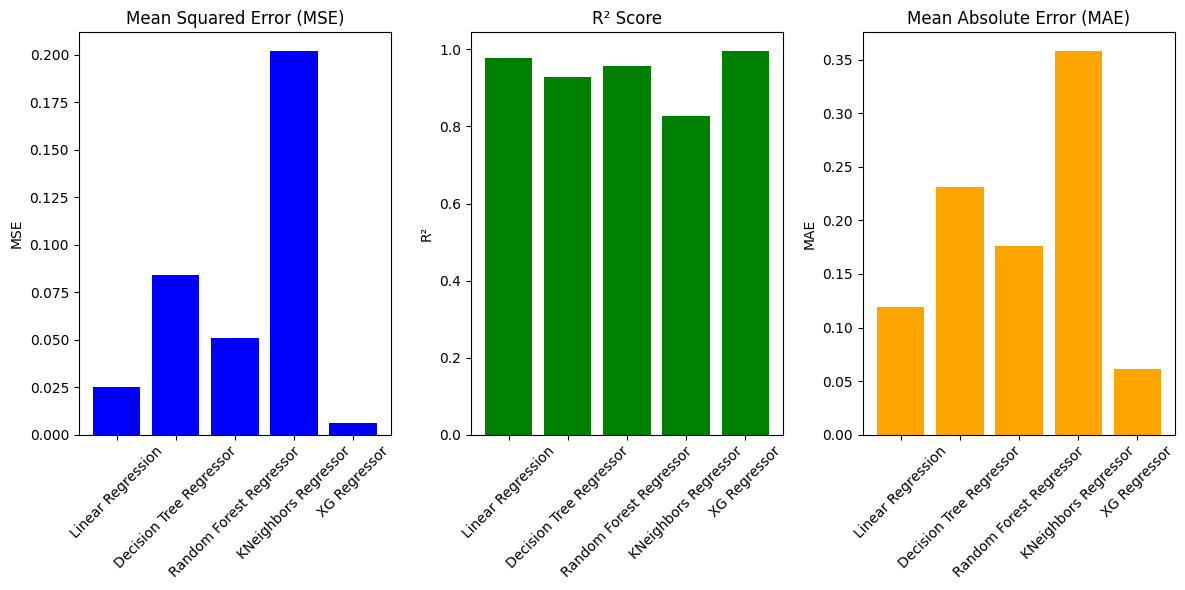

In [15]:
# Plotting the results
model_names = [score[0] for score in model_score]
mse_values = [score[1] for score in model_score]
r2_values = [score[2] for score in model_score]
mae_values = [score[3] for score in model_score]

x = range(len(model_names))

plt.figure(figsize=(12, 6))

# Create bar plots for each metric
plt.subplot(1, 3, 1)
plt.bar(x, mse_values, color='blue')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(x, r2_values, color='green')
plt.xticks(x, model_names, rotation=45)
plt.title('R² Score')
plt.ylabel('R²')

plt.subplot(1, 3, 3)
plt.bar(x, mae_values, color='orange')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

---

**If you found this notebook helpful, please upvote and leave a comment! Your feedback is greatly appreciated.**
<h2 style="text-align: center;">Upvote if you like this notebook!</h2>